# Importing MNIST Dataset

In the first section, the MNIST (Modified National Institute of Standards and Technology) data is imported into the project. This data set consists of a collection of handwritten digits which is the basis for training a machine learning system. The import is performed by the package torchvision. Package description: "The torchvision package consists of popular datasets, model architectures, and common image transformations for computer vision”.

In [4]:
from collections import Counter, defaultdict
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import torchvision.datasets as datasets


In [5]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

len(mnist_trainset)

train_image_zero, train_target_zero = mnist_trainset[0];

# Visualizing the MNIST Dataset

In the following section, we visualize the **MNIST dataset** and examine its properties in detail. This includes graphical representations of character distributions in both the training and test sets, as well as samples of the first characters of each type.

#### **Dataset Overview**

- **Total Images:** 70,000
  - **Training Images:** 60,000
  - **Test Images:** 10,000
- **Image Specifications:**
  - **Size:** 28x28 pixels
  - **Color:** Black and white

#### **Key Observations**

- **Data Distribution:**
  - Histograms reveal that the data is consistently and uniformly distributed across both training and test sets, with no significant outliers.
  
- **Label Distribution:**
  - The distribution of labels in the MNIST test dataset closely mirrors that of the training dataset, with only minor deviations in percentage distribution.
  
- **Labeling:**
  - Each handwritten digit image is paired with a corresponding label that accurately identifies the digit it represents.


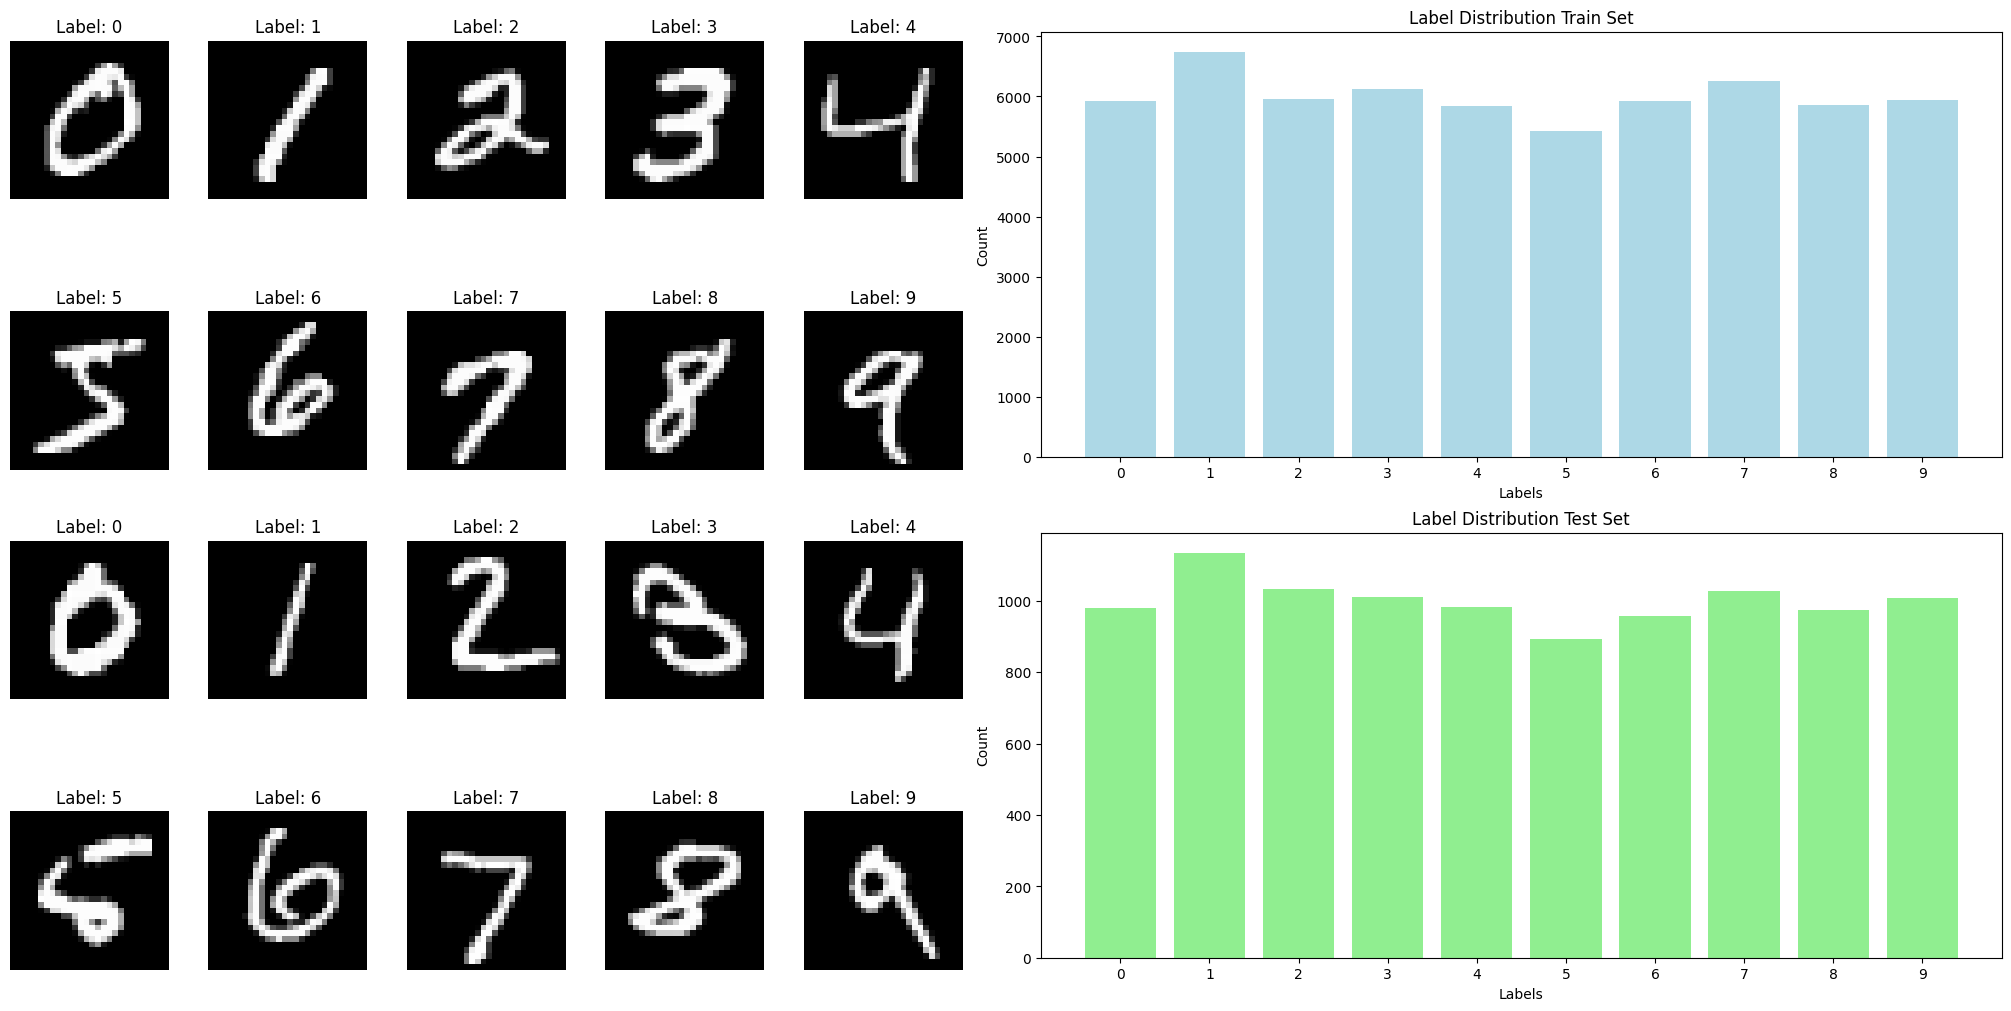

Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})
[(1, 6742), (7, 6265), (3, 6131), (2, 5958), (9, 5949), (0, 5923), (6, 5918), (8, 5851), (4, 5842), (5, 5421)]
Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892})
[(1, 1135), (2, 1032), (7, 1028), (3, 1010), (9, 1009), (4, 982), (0, 980), (8, 974), (6, 958), (5, 892)]


In [16]:
def visualize_datasets(train_dataset, test_dataset):
    def get_counts_samples(dataset):
        counts = Counter()
        samples = {}
        for image, label in dataset:
            counts[label] += 1
            if label not in samples:
                samples[label] = image
        return counts, samples

    train_counts, train_samples = get_counts_samples(train_dataset)
    test_counts, test_samples = get_counts_samples(test_dataset)

    fig = plt.figure(figsize=(20,10), constrained_layout=True)
    gs = gridspec.GridSpec(2,2, figure=fig)

    gs_images_train = gridspec.GridSpecFromSubplotSpec(2,5, subplot_spec=gs[0,0], wspace=0.1, hspace=0.1)
    for i in range(10):
        ax = fig.add_subplot(gs_images_train[i])
        ax.imshow(train_samples[i], cmap='gray')
        ax.set_title(f'Label: {i}')
        ax.axis('off')

    ax1 = fig.add_subplot(gs[0,1])
    labels_train, counts_train = zip(*sorted(train_counts.items()))
    ax1.bar(labels_train, counts_train, color='lightblue')
    ax1.set_xlabel('Labels')
    ax1.set_ylabel('Count')
    ax1.set_title('Label Distribution Train Set')
    ax1.set_xticks(labels_train)

    gs_images_test = gridspec.GridSpecFromSubplotSpec(2,5, subplot_spec=gs[1,0], wspace=0.1, hspace=0.1)
    for i in range(10):
        ax = fig.add_subplot(gs_images_test[i])
        ax.imshow(test_samples[i], cmap='gray')
        ax.set_title(f'Label: {i}')
        ax.axis('off')

    ax3 = fig.add_subplot(gs[1,1])
    labels_test, counts_test = zip(*sorted(test_counts.items()))
    ax3.bar(labels_test, counts_test, color='lightgreen')
    ax3.set_xlabel('Labels')
    ax3.set_ylabel('Count')
    ax3.set_title('Label Distribution Test Set')
    ax3.set_xticks(labels_test)

    plt.show()

    print(train_counts)
    print(train_counts.most_common())
    print(test_counts)
    print(test_counts.most_common())

visualize_datasets(mnist_trainset, mnist_testset);


# Mathematical Concepts in Neural Networks

### 1. Training Loop
*Explanation:* A training loop is a sequence of steps where the model learns: data goes through the model, the error is calculated, and parameters are adjusted.  
*Example:* An image of a "5" goes into the network. If it mistakenly predicts "3," the loop calculates the error and adjusts the weights so that it better recognizes "5" next time.

*Mathematics:*
- *Forward Pass:* $\hat{y} = f(X; \theta)$
- *Loss Calculation:* $L = \text{Loss}(\hat{y}, y)$
- *Backward Pass:* $\frac{\partial L}{\partial \theta} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial \theta}$
- *Update Parameters:* $\theta_{\text{new}} = \theta - \alpha \cdot \frac{\partial L}{\partial \theta}$

### 2. Neural Networks
*Explanation:* A neural network processes the image layer by layer, identifying features and eventually predicting a number.  
*Example:* The image of an "8" goes through the first layer, which detects certain features (like edges and lines), then through the next layer, which identifies more complex patterns, until the network outputs a high probability for "8."

*Mathematics:*
- *Layer 1:* $z_1 = W_1 \cdot x + b_1$
- *Layer 2:* $z_2 = W_2 \cdot z_1 + b_2$
- *Layer 3 (output):* $z_3 = W_3 \cdot z_2 + b_3$
- *Activation per Layer (using ReLU as an example):* $a_i = \text{ReLU}(z_i)$

### 3. Linear Layer
*Explanation:* A linear layer takes the pixel values of images and calculates a prediction value for each digit.  
*Example:* If an image of a "5" goes into the layer, it multiplies pixel values by weights and adds a "bias" (a constant) to estimate whether the number is "5" or another digit.

*Mathematics:*
- *Forward Propagation:* $Z = X \cdot W + B$
  - $X$ is the input matrix (shape: $N \times l$),
  - $W$ are weights (shape: $l \times O$),
  - $B$ is the bias vector (shape: $O$).

### 4. Activation Functions
*Explanation:* Activation functions like ReLU (Rectified Linear Unit) help the network learn complex patterns by creating non-linear relationships.  
*Example:* After a ReLU filter, an image of a "3" might only show positive pixel values, helping the model ignore the background and focus on the actual digit.

*Mathematics:*
- *ReLU (Rectified Linear Unit):* $\text{ReLU}(x) = \max(0, x)$
- *Sigmoid:* $\sigma(x) = \frac{1}{1 + e^{-x}}$
- *Softmax (used for probability distribution over classes):* $\text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}$

### 5. One-Hot Encoding
*Explanation:* One-hot encoding represents each digit as a vector with only one "1" in it.  
*Example:* If the image shows a "7," it is encoded as [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]. For a "3," it would be [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]. This allows the model to identify the digit clearly.

### 6. Loss Functions
*Explanation:* The loss function measures how far the network’s predictions are from the actual values.  
*Example:* If the model misclassifies an image of a "9" as a "4," the loss function shows a large error. For the MNIST dataset, categorical cross-entropy is commonly used, minimizing the error as much as possible.

*Mathematics:*
- *Mean Squared Error (MSE):* $\text{MSE} = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}(x_i))^2$
- *Binary Cross-Entropy (BCE):* $\text{BCE}(y, \hat{y}) = - \frac{1}{N} \sum_{i=1}^N \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]$
- *Categorical Cross-Entropy (CE):* $\text{CE}(y, \hat{y}) = - \sum_{i=1}^N y_i \log(\hat{y}_i)$

### 7. Hyperparameter Tuning
*Explanation:* This means trying different settings (like learning rate) to improve the model.  
*Example:* If the model learns too slowly, we can increase the learning rate. We test different rates and layer sizes until the model achieves the highest accuracy on test images.

*Mathematics:* Grid search or random search is commonly used to find optimal hyperparameters such as:
- *Learning Rate ($\alpha$)* – the step size during gradient descent.
- *Number of Hidden Layers* – additional layers in the network for better feature extraction.
  
### 8. Evaluation
*Explanation:* After training, evaluation checks how often the network correctly recognized digits.  
*Example:* "Accuracy" shows how many images were classified correctly. If the model reaches 95% accuracy, it means it recognized the correct digit in 95 out of 100 images.

*Mathematics:*
- *Accuracy:* $\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}$
- *Precision:* $\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$
- *Recall:* $\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}$
- *F1 Score:* $\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$

### 9. Evaluating Training
*Explanation:* After each round of training (epoch), we compare the error for training and test images.  
*Example:* If the error decreases for training images but increases for test images, the model has "overfitted," meaning it memorized the training data but struggles with new images.

### 10. Histograms
*Explanation:* A histogram shows how often each digit appears in the dataset.  
*Example:* In the MNIST dataset, we might count how often each digit (0-9) appears and create a histogram. There may be 5000 "0s," 5000 "1s," and so on. This helps understand the distribution of digits.

*Mathematics:*  
Given digits $d$ from 0 to 9, count frequency per digit and plot:
- Frequency $= \text{count}(d_i)$ for each $i$ in [0, 9].

### Linear Layer Explained

A **Linear Layer**, also known as a **Fully Connected Layer**, is a fundamental building block in neural networks. Its main purpose is to transform input data into a different space, making it easier for the network to learn and make accurate predictions.

#### Structure

- **Weights $ \mathbf{W} $**: These are the core parameters of the layer. Each weight connects an input feature to an output neuron. The weights are initialized with small random values to start the learning process.
  
- **Biases $ \mathbf{B} $**: These are additional parameters that allow the layer to adjust the output independently of the input. Biases help the model fit the data better by providing flexibility.

#### How It Works

1. **Forward Pass**:
   - **Input $\mathbf{X}$**: The data you feed into the layer.
   - **Computation**: The layer multiplies the input by the weights and then adds the biases.
     $$
     \mathbf{Z} = \mathbf{X} \cdot \mathbf{W} + \mathbf{B}
     $$
   - **Output $\mathbf{Z}$**: The transformed data that moves to the next layer in the network.

2. **Backward Pass**:
   - **Gradient Calculation**: During training, the network adjusts the weights and biases to minimize the error in its predictions. It calculates how much each weight and bias contributed to the error.
   - **Updating Parameters**: Using these gradients, the weights and biases are updated in the opposite direction of the gradient to reduce the error.
      $$
     \mathbf{W} = \mathbf{W} - \text{learning rate} \times \frac{\partial \mathcal{L}}{\partial \mathbf{W}}
     $$
     $$
     \mathbf{B} = \mathbf{B} - \text{learning rate} \times \frac{\partial \mathcal{L}}{\partial \mathbf{B}}
     $$



In [7]:
class LinearLayer:
    def __init__(self, input_dim, output_dim, learning_rate=0.01):
        # He initialization for weights
        self.W = np.random.randn(input_dim, output_dim) * np.sqrt(2. / input_dim)
        self.B = np.zeros(output_dim)
        self.learning_rate = learning_rate

    def forward(self, X):
        # Compute the output: Z = X * W + B
        self.X = X
        self.Z = X @ self.W + self.B
        return self.Z

    def backward(self, dL_dZ):
        # Compute derivatives for the backward pass
        self.dL_dW = self.X.T @ dL_dZ
        self.dL_dB = np.sum(dL_dZ, axis=0)
        self.dL_dX = dL_dZ @ self.W.T
        return self.dL_dX

    def update_parameters(self):
        # Parameter update: θ_new = θ − α * ∂L/∂θ
        self.W -= self.learning_rate * self.dL_dW
        self.B -= self.learning_rate * self.dL_dB

### Unit Test Calculations for `test_linear_layer`

#### Forward Pass Calculation:

$$
\mathbf{Z} = \mathbf{X} \cdot \mathbf{W} + \mathbf{B}
$$

Substituting the values:

$$
\mathbf{X}_{\text{test}} = \begin{bmatrix} 1.0 & 2.0 \\ 3.0 & 4.0 \end{bmatrix}, \quad 
\mathbf{W}_{\text{test}} = \begin{bmatrix} 0.5 & -0.5 \\ 1.0 & -1.0 \end{bmatrix}, \quad 
\mathbf{B}_{\text{test}} = \begin{bmatrix} 0.1 & -0.2 \end{bmatrix}
$$

Matrix Multiplication:

$$
\mathbf{X}_{\text{test}} \cdot \mathbf{W}_{\text{test}} = 
\begin{bmatrix}
1.0 \times 0.5 + 2.0 \times 1.0 & 1.0 \times (-0.5) + 2.0 \times (-1.0) \\
3.0 \times 0.5 + 4.0 \times 1.0 & 3.0 \times (-0.5) + 4.0 \times (-1.0)
\end{bmatrix}
=
\begin{bmatrix}
2.5 & -2.5 \\
5.5 & -5.5
\end{bmatrix}
$$

Addition of Bias:

$$
\mathbf{Z}_{\text{expected}} = 
\begin{bmatrix}
2.5 & -2.5 \\
5.5 & -5.5
\end{bmatrix}
+
\begin{bmatrix}
0.1 & -0.2
\end{bmatrix}
=
\begin{bmatrix}
2.6 & -2.7 \\
5.6 & -5.7
\end{bmatrix}
$$

#### Backward Pass Calculation:

##### a) Gradient with respect to Inputs $ \frac{\partial \mathcal{L}}{\partial \mathbf{X}} $:

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{X}} = \frac{\partial \mathcal{L}}{\partial \mathbf{Z}} \cdot \mathbf{W}^T
$$

Substituting the values:

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{Z}}_{\text{test}} = \begin{bmatrix} 0.5 & -0.5 \\ 0.5 & -0.5 \end{bmatrix}, \quad 
\mathbf{W}_{\text{test}}^T = \begin{bmatrix} 0.5 & 1.0 \\ -0.5 & -1.0 \end{bmatrix}
$$

Calculation:

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{X}} =
\begin{bmatrix}
0.5 \times 0.5 + (-0.5) \times (-0.5) & 0.5 \times 1.0 + (-0.5) \times (-1.0) \\
0.5 \times 0.5 + (-0.5) \times (-0.5) & 0.5 \times 1.0 + (-0.5) \times (-1.0)
\end{bmatrix}
=
\begin{bmatrix}
0.5 & 1.0 \\
0.5 & 1.0
\end{bmatrix}
$$

##### b) Gradient with respect to Weights $ \frac{\partial \mathcal{L}}{\partial \mathbf{W}} $:

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{W}} = \mathbf{X}^T \cdot \frac{\partial \mathcal{L}}{\partial \mathbf{Z}}
$$

Substituting the values:

$$
\mathbf{X}_{\text{test}}^T = \begin{bmatrix} 1.0 & 3.0 \\ 2.0 & 4.0 \end{bmatrix}, \quad 
\frac{\partial \mathcal{L}}{\partial \mathbf{Z}}_{\text{test}} = \begin{bmatrix} 0.5 & -0.5 \\ 0.5 & -0.5 \end{bmatrix}
$$

Calculation:

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{W}} =
\begin{bmatrix}
1.0 \times 0.5 + 3.0 \times 0.5 & 1.0 \times (-0.5) + 3.0 \times (-0.5) \\
2.0 \times 0.5 + 4.0 \times 0.5 & 2.0 \times (-0.5) + 4.0 \times (-0.5)
\end{bmatrix}
=
\begin{bmatrix}
2.0 & -2.0 \\
3.0 & -3.0
\end{bmatrix}
$$

##### c) Gradient with respect to Bias $ \frac{\partial \mathcal{L}}{\partial \mathbf{B}} $:

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{B}} = \sum_{i=1}^{m} \frac{\partial \mathcal{L}}{\partial \mathbf{Z}_i} = \begin{bmatrix} 1.0 & -1.0 \end{bmatrix}
$$

#### Parameter Update Calculation:

##### a) Updating Weights $ \mathbf{W} $:

$$
\mathbf{W}_{\text{updated\_expected}} = \mathbf{W}_{\text{test}} - \eta \cdot \frac{\partial \mathcal{L}}{\partial \mathbf{W}}
$$

Substituting the values:

$$
\eta = 0.01, \quad 
\mathbf{W}_{\text{test}} = \begin{bmatrix} 0.5 & -0.5 \\ 1.0 & -1.0 \end{bmatrix}, \quad 
\frac{\partial \mathcal{L}}{\partial \mathbf{W}} = \begin{bmatrix} 2.0 & -2.0 \\ 3.0 & -3.0 \end{bmatrix}
$$

Calculation:

$$
\mathbf{W}_{\text{updated\_expected}} = 
\begin{bmatrix}
0.5 & -0.5 \\
1.0 & -1.0
\end{bmatrix}
-
0.01 \times 
\begin{bmatrix}
2.0 & -2.0 \\
3.0 & -3.0
\end{bmatrix}
=
\begin{bmatrix}
0.5 - 0.02 & -0.5 + 0.02 \\
1.0 - 0.03 & -1.0 + 0.03
\end{bmatrix}
=
\begin{bmatrix}
0.48 & -0.48 \\
0.97 & -0.97
\end{bmatrix}
$$

##### b) Updating Bias $ \mathbf{B} $:

$$
\mathbf{B}_{\text{updated\_expected}} = \mathbf{B}_{\text{test}} - \eta \cdot \frac{\partial \mathcal{L}}{\partial \mathbf{B}}
$$

Substituting the values:

$$
\eta = 0.01, \quad 
\mathbf{B}_{\text{test}} = \begin{bmatrix} 0.1 & -0.2 \end{bmatrix}, \quad 
\frac{\partial \mathcal{L}}{\partial \mathbf{B}} = \begin{bmatrix} 1.0 & -1.0 \end{bmatrix}
$$

Calculation:

$$
\mathbf{B}_{\text{updated\_expected}} = 
\begin{bmatrix}
0.1 & -0.2
\end{bmatrix}
-
0.01 \times 
\begin{bmatrix}
1.0 & -1.0
\end{bmatrix}
=
\begin{bmatrix}
0.1 - 0.01 & -0.2 + 0.01
\end{bmatrix}
=
\begin{bmatrix}
0.09 & -0.19
\end{bmatrix}
$$


In [8]:
# Unit tests
def test_linear_layer():
    # Fixed values for inputs, weights, and learning rate
    X_test = np.array([[1.0, 2.0], [3.0, 4.0]])
    W_test = np.array([[0.5, -0.5], [1.0, -1.0]])
    B_test = np.array([0.1, -0.2])
    learning_rate = 0.01
    dL_dZ_test = np.array([[0.5, -0.5], [0.5, -0.5]])

    # Instantiate the layer and set fixed parameters
    layer = LinearLayer(input_dim=2, output_dim=2, learning_rate=learning_rate)
    layer.W = W_test
    layer.B = B_test

    # Test forward pass
    Z_expected = X_test @ W_test + B_test
    Z_output = layer.forward(X_test)
    assert np.allclose(Z_output, Z_expected), "Forward pass error"

    # Test backward pass
    dL_dX_expected = dL_dZ_test @ W_test.T
    dL_dW_expected = X_test.T @ dL_dZ_test
    dL_dB_expected = np.sum(dL_dZ_test, axis=0)
    
    dL_dX_output = layer.backward(dL_dZ_test)
    assert np.allclose(dL_dX_output, dL_dX_expected), "Backward pass error in dL/dX"
    assert np.allclose(layer.dL_dW, dL_dW_expected), "Backward pass error in dL/dW"
    assert np.allclose(layer.dL_dB, dL_dB_expected), "Backward pass error in dL/dB"

    # Test parameter update
    W_updated_expected = W_test - learning_rate * dL_dW_expected
    B_updated_expected = B_test - learning_rate * dL_dB_expected

    layer.update_parameters()
    assert np.allclose(layer.W, W_updated_expected), "Update error in W"
    assert np.allclose(layer.B, B_updated_expected), "Update error in B"

    print("All tests passed!")

# Run tests
test_linear_layer()

All tests passed!


### Preprocessing
To prepare the training data for a machine learning model, a function named `preprocess_data` is first defined. This function accepts an MNIST dataset object and performs the following steps:

First, the image data is normalized by scaling the pixel values of the images to the range \([0, 1]\). This is done by dividing each pixel value by \(255.0\), making the values consistent and more manageable for many machine learning algorithms. Subsequently, the image data is flattened, meaning each image, which originally has a size of \(28 \times 28\) pixels, is converted into a one-dimensional vector of length \(784\). This conversion is important because many models, especially simple neural networks, expect inputs as 1D vectors.

The target variables, i.e., the data labels, are provided in two forms: as original integer labels and as a one-hot encoded matrix. For this purpose, the function `one_hot_encode` is used, which converts each categorical label into a binary vector. The index corresponding to the label is marked with a \(1\), while all other positions are set to \(0\). For example, the label \(3\) is converted into the vector \([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]\). This one-hot encoding is particularly useful for classification tasks, as it transforms the labels into a format that can be directly compared with the outputs of classification models, especially when using Softmax or cross-entropy loss functions.

After processing all image-label pairs, the lists are converted into NumPy arrays. The result is two arrays:
- **X**: An array with the shape \((\text{number of samples}, 784)\) that contains the normalized and flattened images.
- **Y**: An array with the shape \((\text{number of samples}, 10)\) that contains the one-hot encoded labels.

These preprocessed data can now be used directly as input for a neural network or another machine learning model. By normalizing and flattening the images as well as one-hot encoding the labels, it is ensured that the data is in a format that can be efficiently processed by most models.

In [9]:
def preprocess_image_data(data):
    """
    Converts a list of (<PIL.Image.Image image mode=L size=28x28>, label) to 
    (numpy array of flattened images, one-hot encoded labels).
    
    Parameters:
    - data: List of tuples where each tuple is (<PIL.Image.Image>, label).
    
    Returns:
    - X: numpy array of shape (num_samples, 784) with normalized and flattened images.
    - Y: numpy array of shape (num_samples, 10) with one-hot encoded labels.
    """
    X = []
    Y = []
    
    for img, label in data:
        # Convert image to numpy array and normalize pixels to the range [0, 1]
        img_array = np.array(img, dtype=np.float32) / 255.0
        # Flatten the image (28x28) to a 1D array of size 784
        img_flat = img_array.flatten()
        X.append(img_flat)
        
        # Create a one-hot encoded vector for the label
        one_hot = np.zeros(10)
        one_hot[label] = 1
        Y.append(one_hot)
    
    # Convert lists to numpy arrays
    X = np.array(X)
    Y = np.array(Y)
    
    return X, Y

# Example usage
# Assuming `data` is a list of tuples in the format (<PIL.Image.Image image mode=L size=28x28>, label)
# X, Y = preprocess_image_data(data)

In [10]:
class NeuralNetwork:
    def __init__(self, input_dim, hidden_dim, output_dim, learning_rate=0.01):
        self.layer1 = LinearLayer(input_dim, hidden_dim, learning_rate)
        self.layer2 = LinearLayer(hidden_dim, hidden_dim, learning_rate)
        self.layer3 = LinearLayer(hidden_dim, hidden_dim, learning_rate)
        self.output_layer = LinearLayer(hidden_dim, output_dim, learning_rate)

    def forward(self, X):
        self.Z1 = np.maximum(0, self.layer1.forward(X))  # ReLU activation
        self.Z2 = np.maximum(0, self.layer2.forward(self.Z1))  # ReLU activation
        self.Z3 = np.maximum(0, self.layer3.forward(self.Z2))  # ReLU activation
        self.output = self.softmax(self.output_layer.forward(self.Z3))
        return self.output

    def backward(self, dL_dY):
        dL_dZ3 = self.output_layer.backward(dL_dY)
        dL_dZ3[self.Z3 <= 0] = 0
        dL_dZ2 = self.layer3.backward(dL_dZ3)
        dL_dZ2[self.Z2 <= 0] = 0
        dL_dZ1 = self.layer2.backward(dL_dZ2)
        dL_dZ1[self.Z1 <= 0] = 0
        self.layer1.backward(dL_dZ1)

    def update_parameters(self):
        self.layer1.update_parameters()
        self.layer2.update_parameters()
        self.layer3.update_parameters()
        self.output_layer.update_parameters()

    def softmax(self, Z):
        expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        return expZ / expZ.sum(axis=1, keepdims=True)

    def cross_entropy_loss(self, Y_pred, Y_true):
        n_samples = Y_true.shape[0]
        log_likelihood = -np.log(Y_pred[range(n_samples), Y_true.argmax(axis=1)])
        return np.sum(log_likelihood) / n_samples

    def compute_accuracy(self, Y_pred, Y_true):
        predictions = np.argmax(Y_pred, axis=1)
        labels = np.argmax(Y_true, axis=1)
        return np.mean(predictions == labels)

# Training Loop
def train_network(network, X_train, Y_train, X_test, Y_test, epochs=5, batch_size=32):
    train_history = defaultdict(list)
    test_history = defaultdict(list)
    
    for epoch in range(epochs):
        # Shuffle the data
        indices = np.arange(X_train.shape[0])
        np.random.shuffle(indices)
        X_train = X_train[indices]
        Y_train = Y_train[indices]

        # Mini-batch training
        for start in range(0, X_train.shape[0], batch_size):
            end = start + batch_size
            X_batch = X_train[start:end]
            Y_batch = Y_train[start:end]

            # Forward pass
            Y_pred = network.forward(X_batch)

            # Compute loss and accuracy
            loss = network.cross_entropy_loss(Y_pred, Y_batch)
            accuracy = network.compute_accuracy(Y_pred, Y_batch)

            # Backward pass and parameter update
            dL_dY = Y_pred - Y_batch  # Derivative of loss with respect to predictions
            network.backward(dL_dY)
            network.update_parameters()

        # Evaluate on test data after each epoch
        Y_test_pred = network.forward(X_test)
        test_loss = network.cross_entropy_loss(Y_test_pred, Y_test)
        test_accuracy = network.compute_accuracy(Y_test_pred, Y_test)
        print(f"Epoch {epoch+1}/{epochs} - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}, "
              f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
        # , Activation Value X: {network.Z1}
        
        
        Y_train_pred = network.forward(X_train)
        train_loss = network.cross_entropy_loss(Y_train_pred, Y_train)
        train_accuracy = network.compute_accuracy(Y_train_pred, Y_train)
        train_history['loss'].append(train_loss)
        train_history['accuracy'].append(train_accuracy)

        Y_test_pred = network.forward(X_test)
        test_loss = network.cross_entropy_loss(Y_test_pred, Y_test)
        test_accuracy = network.compute_accuracy(Y_test_pred, Y_test)
        test_history['loss'].append(test_loss)
        test_history['accuracy'].append(test_accuracy)

    return train_history, test_history

# Assuming X_train, Y_train, X_test, and Y_test are available
input_dim = 784  # For example, 28x28 images flattened
hidden_dim = 128
output_dim = 10  # 10 classes for digits 0-9
learning_rate = 0.0001

train_X, train_Y = preprocess_image_data(mnist_trainset)

test_X, test_Y = preprocess_image_data(mnist_testset)

network = NeuralNetwork(input_dim, hidden_dim, output_dim, learning_rate)
# Call train_network with training and test data.
#train_network(network,train_X , train_Y, test_X, test_Y)


### Evaluating the Neural Network

In this part of the project, we evaluate the neural network that was created and trained to classify images from the MNIST dataset. Specifically, we aimed to assess the impact of various hyperparameters, such as learning rate and hidden layer size, on the performance of the model.

We trained the network with multiple combinations of learning rates (0.001, 0.01, 0.1) and hidden layer sizes (4, 8, 16). The training process involved monitoring key metrics like training and testing accuracy, as well as loss values over 10 epochs for each hyperparameter combination. These metrics allow us to gauge how well the model is learning and to identify trends that can help optimize its performance.

The results were plotted to visualize the effects of different hyperparameters on both training and testing performance. The plots include:

- **Training Accuracy**: How accurately the network predicted the training images for each hyperparameter combination.
- **Training Loss**: The reduction in error during training, indicating the effectiveness of gradient descent.
- **Test Accuracy**: The performance of the network on unseen test images, which reflects the generalization ability.
- **Test Loss**: The error rate on the test set, helping us determine if the network is overfitting or underfitting.

These visualizations provide an overview of which hyperparameter combinations led to optimal performance, helping us make informed decisions about model tuning. Overall, this evaluation approach helps ensure the robustness of the neural network and its ability to accurately classify new data.



In [11]:
# Preprocessing the MNIST dataset for the Training and Test data
X_train, Y_train = preprocess_image_data(mnist_trainset)
X_test, Y_test = preprocess_image_data(mnist_testset)

# Hyperparameter tuning
learning_rates = [0.001, 0.01, 0.1]
hidden_layer_sizes = [4, 8, 16]

# Dictionary to store results for different hyperparameters
results = {}

for lr in learning_rates:
    for hidden_size in hidden_layer_sizes:
        print(f"\nTraining with learning rate {lr} and hidden layer size {hidden_size}")
        network = NeuralNetwork(input_dim=784, hidden_dim=hidden_size, output_dim=10, learning_rate=lr)
        train_history, test_history = train_network(network, X_train, Y_train, X_test, Y_test, epochs=10)
        results[(lr, hidden_size)] = {
            'train_history': train_history,
            'test_history': test_history
        }



Training with learning rate 0.001 and hidden layer size 4
Epoch 1/10 - Loss: 2.3137, Accuracy: 0.0625, Test Loss: 2.3009, Test Accuracy: 0.1135
Epoch 2/10 - Loss: 2.2968, Accuracy: 0.1562, Test Loss: 2.3012, Test Accuracy: 0.1135
Epoch 3/10 - Loss: 2.3155, Accuracy: 0.0000, Test Loss: 2.3011, Test Accuracy: 0.1135
Epoch 4/10 - Loss: 2.2847, Accuracy: 0.1562, Test Loss: 2.3013, Test Accuracy: 0.1135
Epoch 5/10 - Loss: 2.3085, Accuracy: 0.0938, Test Loss: 2.3012, Test Accuracy: 0.1135
Epoch 6/10 - Loss: 2.2879, Accuracy: 0.1875, Test Loss: 2.3012, Test Accuracy: 0.1135
Epoch 7/10 - Loss: 2.2938, Accuracy: 0.0625, Test Loss: 2.3013, Test Accuracy: 0.1135
Epoch 8/10 - Loss: 2.3044, Accuracy: 0.0625, Test Loss: 2.3012, Test Accuracy: 0.1135
Epoch 9/10 - Loss: 2.2763, Accuracy: 0.3125, Test Loss: 2.3014, Test Accuracy: 0.1135
Epoch 10/10 - Loss: 2.3034, Accuracy: 0.0938, Test Loss: 2.3010, Test Accuracy: 0.1135

Training with learning rate 0.001 and hidden layer size 8
Epoch 1/10 - Loss: 0.

/var/folders/v4/v7c_9z4x5gg9538dhddwwk4h0000gn/T/ipykernel_18584/783895718.py:36: RuntimeWarning: divide by zero encountered in log
  log_likelihood = -np.log(Y_pred[range(n_samples), Y_true.argmax(axis=1)])


Epoch 1/10 - Loss: 2.4198, Accuracy: 0.0000, Test Loss: 2.3157, Test Accuracy: 0.1135
Epoch 2/10 - Loss: 2.3175, Accuracy: 0.2188, Test Loss: 2.3394, Test Accuracy: 0.1135
Epoch 3/10 - Loss: 2.2956, Accuracy: 0.1250, Test Loss: 2.3305, Test Accuracy: 0.0974
Epoch 4/10 - Loss: 2.2894, Accuracy: 0.1562, Test Loss: 2.3243, Test Accuracy: 0.1135
Epoch 5/10 - Loss: 2.3405, Accuracy: 0.1250, Test Loss: 2.3321, Test Accuracy: 0.1010
Epoch 6/10 - Loss: 2.3562, Accuracy: 0.0938, Test Loss: 2.3271, Test Accuracy: 0.1010
Epoch 7/10 - Loss: 2.3249, Accuracy: 0.0938, Test Loss: 2.3135, Test Accuracy: 0.1032
Epoch 8/10 - Loss: 2.2187, Accuracy: 0.2812, Test Loss: 2.3538, Test Accuracy: 0.1135
Epoch 9/10 - Loss: 2.3297, Accuracy: 0.1250, Test Loss: 2.3205, Test Accuracy: 0.1010
Epoch 10/10 - Loss: 2.3239, Accuracy: 0.1562, Test Loss: 2.3181, Test Accuracy: 0.1028


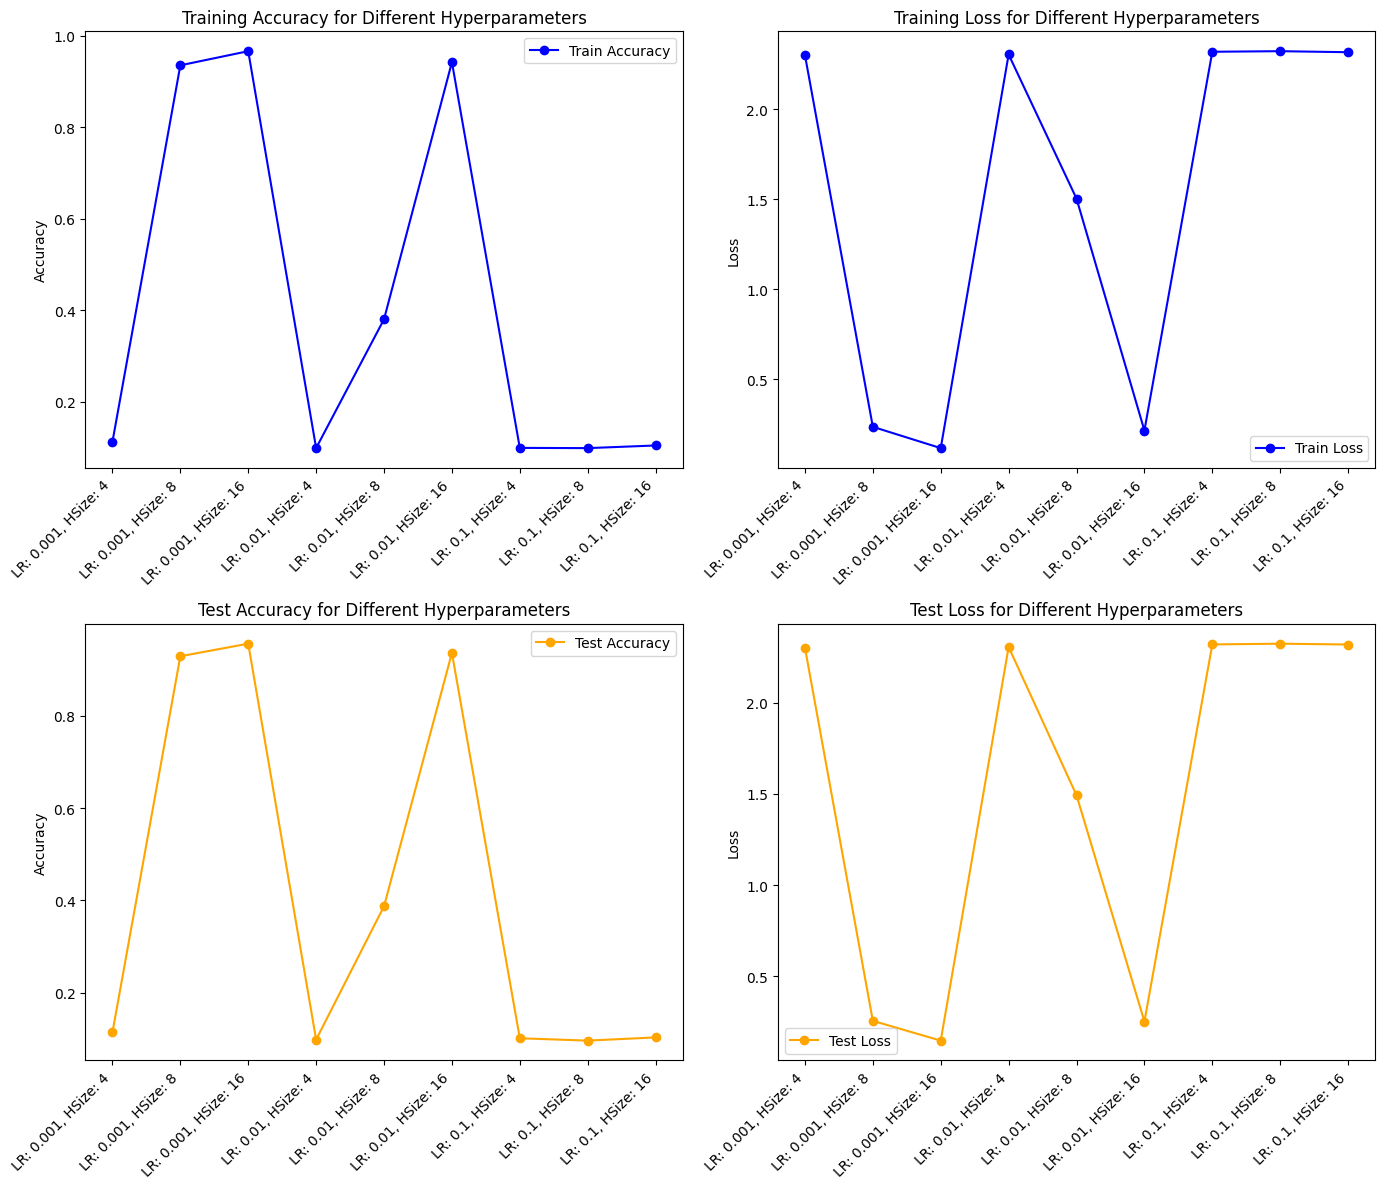

In [12]:
# Function which plots the results from the hyperparameter tuning
def plot_results(results):
    learning_rates = sorted({lr for (lr, _) in results.keys()})
    hidden_layer_sizes = sorted({size for (_, size) in results.keys()})

    train_accuracies = []
    test_accuracies = []
    train_losses = []
    test_losses = []
    labels = []

# Extracting the results for each hyperparameter combination into separate list so plotting can be done
    for lr in learning_rates:
        for size in hidden_layer_sizes:
            key = (lr, size)
            if key in results:
                train_accuracies.append(results[key]['train_history']['accuracy'][-1])
                test_accuracies.append(results[key]['test_history']['accuracy'][-1])
                train_losses.append(results[key]['train_history']['loss'][-1])
                test_losses.append(results[key]['test_history']['loss'][-1])
                labels.append(f"LR: {lr}, HSize: {size}")

    fig, axs = plt.subplots(2, 2, figsize=(14, 12))

    x = np.arange(len(labels))

    # Plotting Training Accuracy
    axs[0, 0].plot(x, train_accuracies, marker='o', label='Train Accuracy', color='blue')
    axs[0, 0].set_xticks(x)
    axs[0, 0].set_xticklabels(labels, rotation=45, ha="right")
    axs[0, 0].set_ylabel('Accuracy')
    axs[0, 0].set_title('Training Accuracy for Different Hyperparameters')
    axs[0, 0].legend()

    # Plotting Training Loss
    axs[0, 1].plot(x, train_losses, marker='o', label='Train Loss', color='blue')
    axs[0, 1].set_xticks(x)
    axs[0, 1].set_xticklabels(labels, rotation=45, ha="right")
    axs[0, 1].set_ylabel('Loss')
    axs[0, 1].set_title('Training Loss for Different Hyperparameters')
    axs[0, 1].legend()

    # Plotting Test Accuracy
    axs[1, 0].plot(x, test_accuracies, marker='o', label='Test Accuracy', color='orange')
    axs[1, 0].set_xticks(x)
    axs[1, 0].set_xticklabels(labels, rotation=45, ha="right")
    axs[1, 0].set_ylabel('Accuracy')
    axs[1, 0].set_title('Test Accuracy for Different Hyperparameters')
    axs[1, 0].legend()

    # Plotting Test Loss
    axs[1, 1].plot(x, test_losses, marker='o', label='Test Loss', color='orange')
    axs[1, 1].set_xticks(x)
    axs[1, 1].set_xticklabels(labels, rotation=45, ha="right")
    axs[1, 1].set_ylabel('Loss')
    axs[1, 1].set_title('Test Loss for Different Hyperparameters')
    axs[1, 1].legend()

    plt.tight_layout()
    plt.show()
    
# Plotting the results from the hyperparameter tuning    
plot_results(results)

### Results Analysis

The evaluation of different hyperparameters shows their significant impact on network performance.

- **Accuracy & Loss**: Both training and test accuracies are high for some combinations, but steep drops occur with unsuitable parameters. Loss patterns confirm that higher learning rates and small hidden layers can destabilize training.

- **Hyperparameter Impact**: A moderate learning rate with balanced hidden layer size tends to provide the best results, balancing learning speed, accuracy, and stability.

The key takeaway is the need for balanced hyperparameter tuning to achieve both effective learning and generalization.
In this case a Learning Rate of 0.001 and Hidden Layer Size of 16 seems to be the highest achieving combination.

